## Analyse descente de gradient

Dans ce notebook on veut étudier le comportement de la descente de gradient et du learning rate


On note : 

1. $ \theta$ les paramètres du modèles où theta est un vecteur
2. $ g_i $ le gradient de la fonction de coût à l'itération $i$ dans le cadre de la descente de gradient
3. $ \alpha $ le learning rate


On rappelle que la descente de gradient est une algorithme pour rechercher le minimum d'une fonction de manière itérative : on part d'un point initial et on tente de se rapprocher du minimum pas à pas.



Coder une fonction **square(x)** qui retourne $(x - 2)^2$ 

In [1]:
square = lambda x: (x-2)**2

Avec matplotlib afficher le graphe de x,f(x) quand x varie entre -2 et 8

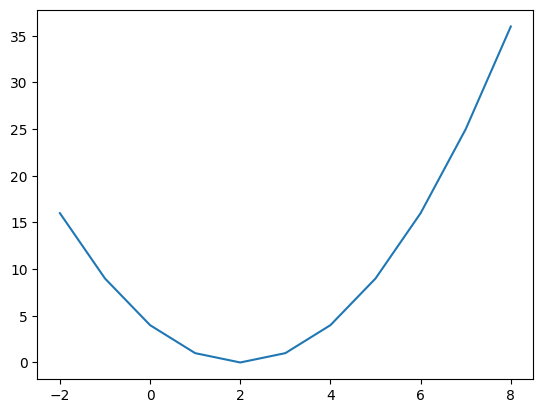

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(-2,9)
plt.plot(x, square(x))

Calculer la dérivée de la fonction ci dessus et faire une **fonction deriv_f_function(x)** qui retoune la dérivée de f en un point x donné

In [3]:
deriv_f_function = lambda x: 2*(x-2)

Faire une fonction **gradient_descent(x0, alpha, n_iteration)** qui prend un point $x_0$ initial et qui effectue la descente de gradient pour n_iteration.

La fonction  **gradient_descent** devra renvoyer la liste de tous les $x$ par lequel le gradient passe

In [4]:
def gradient_descent(x0:float, alpha:float, n_iteration:int):
    Xt:list = [x0]
    for _ in range(n_iteration):
        Xt.append(Xt[-1] - alpha*deriv_f_function(Xt[-1])) # Xt[-1] pour récupérer la dernière valeur du tableau
    return Xt

Calculer le vecteur de la descente de gradient pour n_iteration =10, alpha = 0.1 et x0 = 5.5

Afficher sur un même graphique la fonction et les points par lesquels la descente de gradient est passée. Il faudra calculer la valeur de la fonction pour chacun des points considérés

In [5]:
print(np.array(gradient_descent(5.5, .1, 10)))

[5.5        4.8        4.24       3.792      3.4336     3.14688
 2.917504   2.7340032  2.58720256 2.46976205 2.37580964]


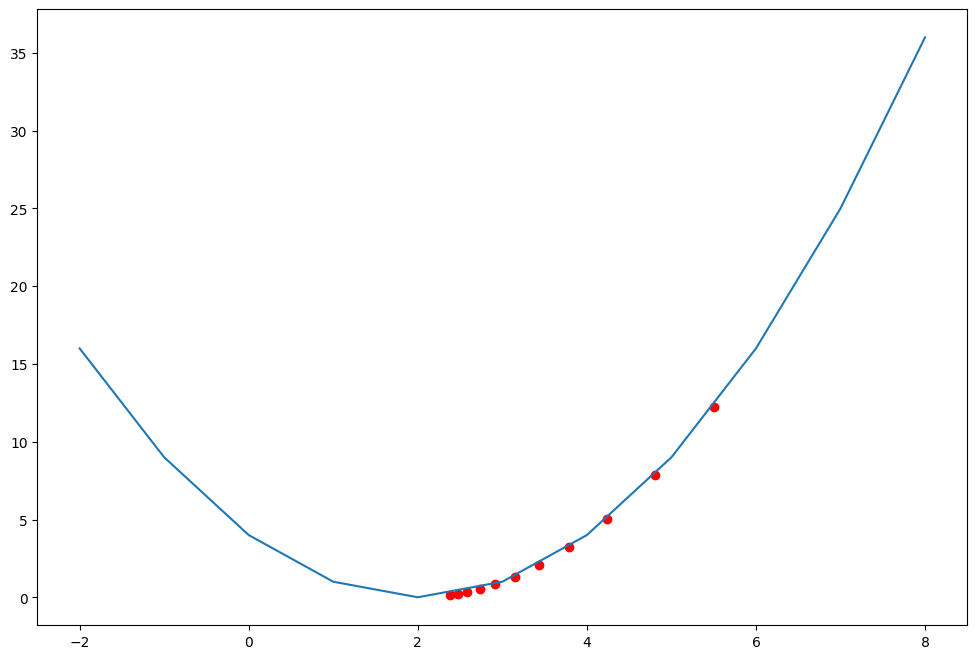

In [6]:
x=np.arange(-2,9)
plt.figure(figsize=(12,8))
plt.plot(x, square(x))
plt.scatter(np.array(gradient_descent(5.5, .1, 10)), square(np.array(gradient_descent(5.5, .1, 10))), c='r')

Faire de même pour n_iteration=10, alpha = 0.3 et x0 = 5.5

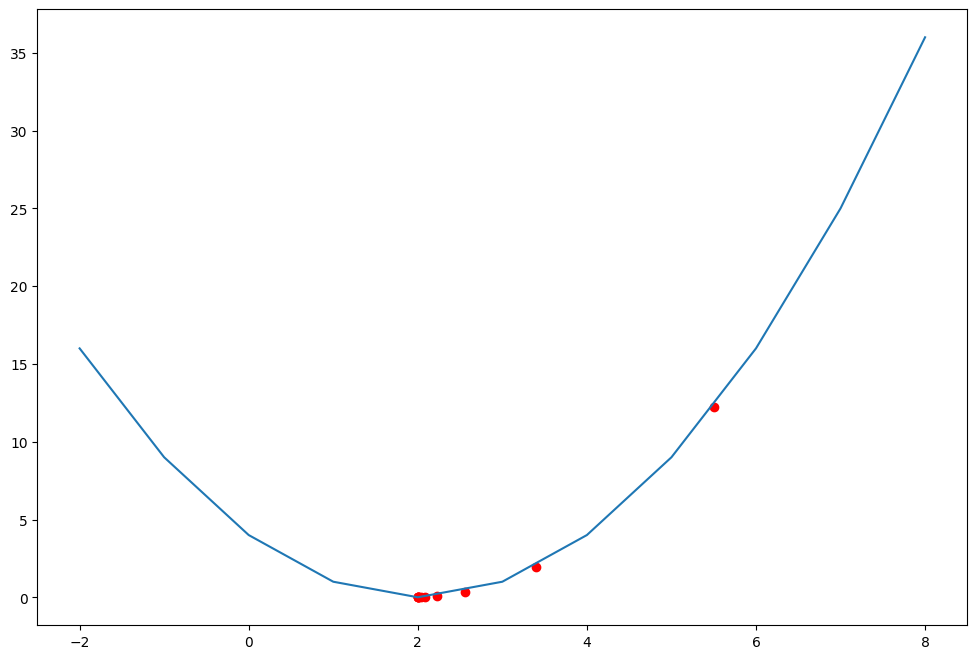

In [7]:
x=np.arange(-2,9)
plt.figure(figsize=(12,8))
plt.plot(x, square(x))
plt.scatter(np.array(gradient_descent(5.5, .3, 10)), square(np.array(gradient_descent(5.5, .3, 10))), c='r')

Faire de même pour n_iteration = 10, alpha = 0.01 et x0 = 5.5

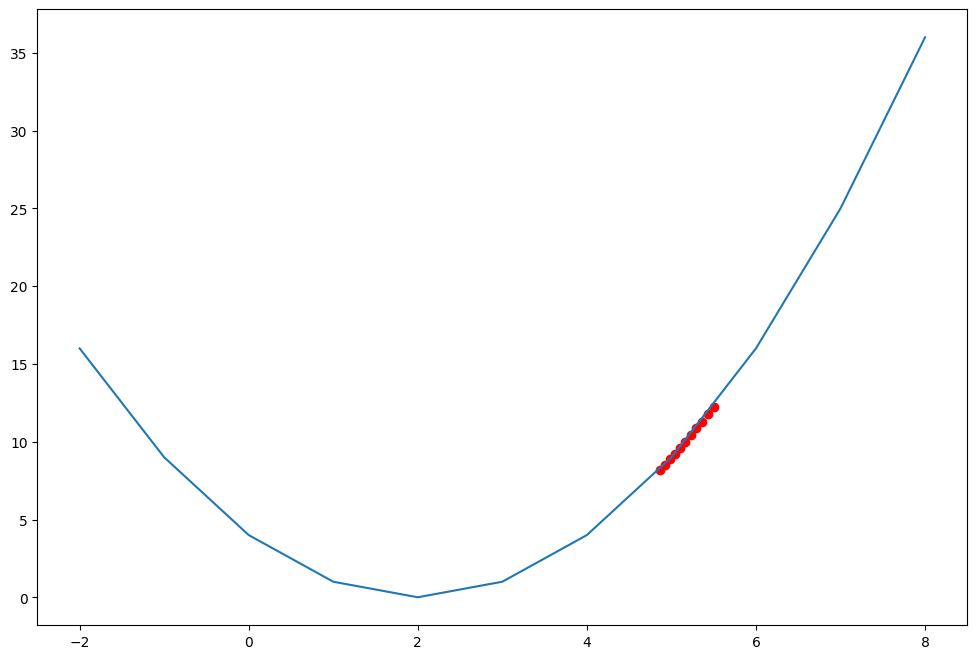

In [8]:
x=np.arange(-2,9)
plt.figure(figsize=(12,8))
plt.plot(x, square(x))
plt.scatter(np.array(gradient_descent(5.5, .01, 10)), square(np.array(gradient_descent(5.5, .01, 10))), c='r')

Faire de même pour n_iteration = 10, alpha = 2 et x0 = 5.5

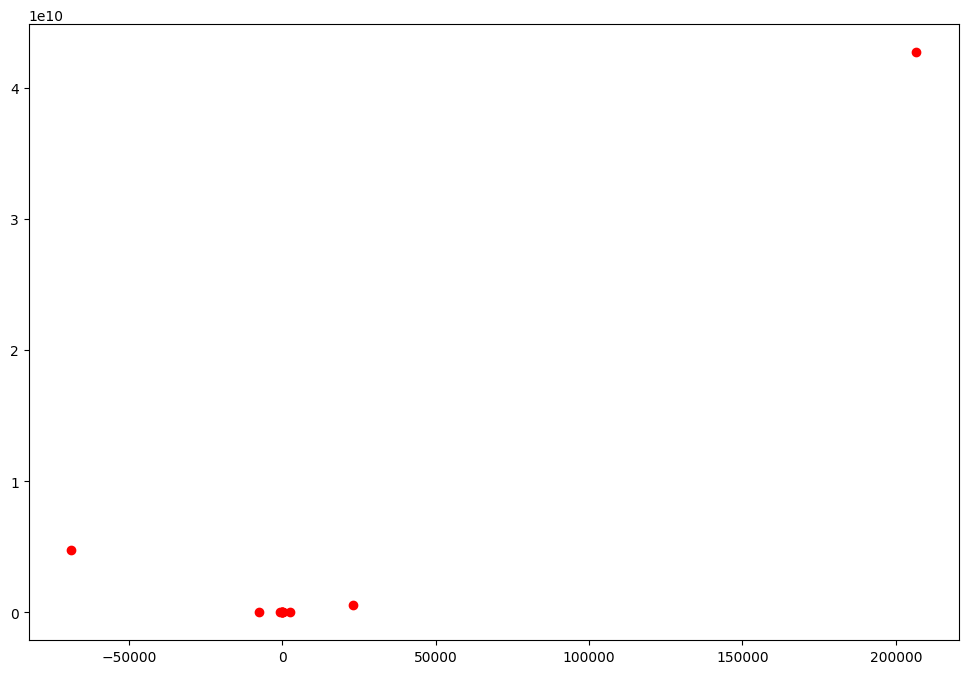

In [9]:
x=np.arange(-2,9)
plt.figure(figsize=(12,8))
plt.plot(x, square(x))
plt.scatter(np.array(gradient_descent(5.5, 2, 10)), square(np.array(gradient_descent(5.5, 2, 10))), c='r')

Que se passe-t-il si le learning rate est trop grand ?

Lorsque le learning rate est trop grand, nous allons osciller autour du minimum recherché.

## Version 2D


Coder une fonction **two_arg_polynomial(x, y)** qui retourne x*(y -1) + x ^2 + (y -1 ) ^2

In [10]:
two_arg_polynomial = lambda x,y :  x*(y -1) + x**2 + (y -1 )**2

En analysant l'expression mathématique, quelle est le minimum de cette fonction ?

Le minimum de cette fonction est (0, 1)

Afficher le graphe 3D de z = f(x,y) en fonction de x et y  avec matplotlib

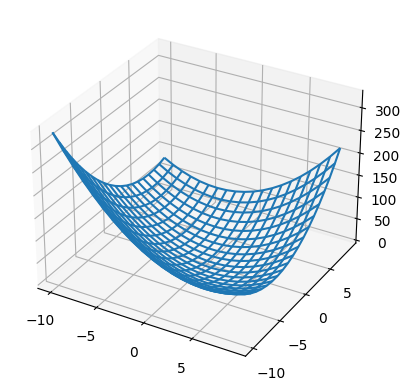

In [11]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
x,y = np.arange(-10,10), np.arange(-10,10)
z = two_arg_polynomial(x,y)
X,Y = np.meshgrid(x,y)
Z = two_arg_polynomial(X,Y)
ax.plot_wireframe(X, Y, Z)


Afficher un graphe nommé contour plot de la fonction

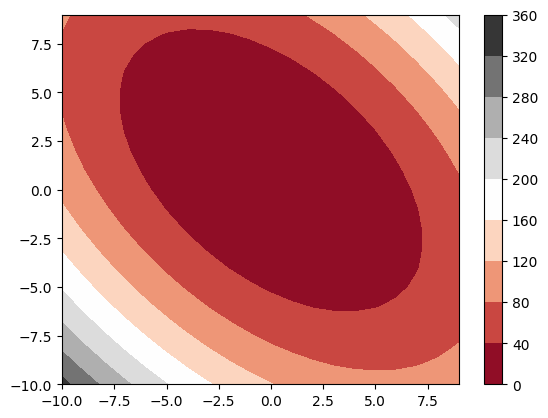

In [12]:
plt.contourf(X,Y,Z,10, cmap='RdGy')
plt.colorbar()

Calculer la formule du gradient pour cette fonction

In [13]:
gradient = lambda x,y: np.array([(y-1+(2*x)), (x+2*(y-1))])

Coder la fonction **descent_gradient_2D_polynomial** pour cette fonction de la même manière que l'exercice précédent 

In [14]:
def descent_gradient_2D_polynomial(vecteur_initialisation:np.ndarray, alpha:float, n_iteration:int):
    r = [vecteur_initialisation]
    for _ in range(n_iteration):
        r.append(r[-1] - alpha*gradient(r[-1][0], r[-1][1]))
    return r

Effectuer la descente de gradient sur votre fonction et afficher les points par lequel elle passe pour alpha = 0.1 et en prenant x0 =3 et y0 = 3

In [15]:
gradient_desc = descent_gradient_2D_polynomial(np.array([3,3]), .2, 20)

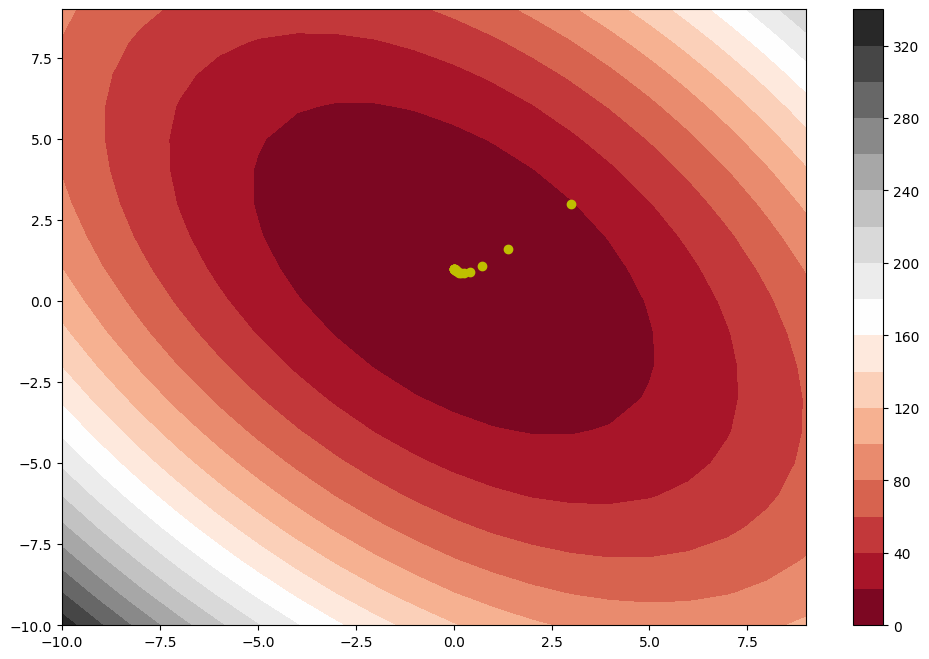

In [16]:
plt.figure(figsize=(12,8))
plt.contourf(X,Y,Z, 20, cmap='RdGy')
plt.colorbar()
for g in gradient_desc:
    plt.scatter(g[0], g[1], c='y')


## Le momentum : Bonus

Une amélioration simple de la descente de gradient est d'améliorer la descente de gradient avec ce qu'on appelle le momentum: l'idée est de garder la valeur précédente du gradient et changer la règle de mise à jour. 

créer une fonction moment_descent_gradient qui effectue la descente de gradient sur la fonction (x-2)^2

L'idée du momentum est la suivante : 


si on note $ g_{i} $ le gradient à l'itération $i$ 

alors la règle de mise jour des paramètre qui était 

$\theta_{i+1} = \theta_{i} - \alpha * g_i $ 

devient 

$ \theta_{i+1} = \theta{i} - (\alpha * g_i + momentum * \alpha * g_{i-1} ) $ 

In [17]:
def moment_descent_gradient(x0:float, x1:float=0, alpha:float, n_itra):
    r = 

SyntaxError: non-default argument follows default argument (2500886630.py, line 1)

Faire une descente de gradient qui utilise le momemtum et le tester avec plusieurs valeurs de momentum et n_iteration =10. Existe-t-il des valeur où l'algorithme converge plus rapidement ? 

Faire de même pour la fonction en 2D

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5911237d-bf07-4252-964e-d1881f596410' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>